# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.7.1'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

2

: 

['Papua New Guinea', 'Namibia', 'Bahamas']

,
 

3

: 

[

'Eritrea'

, 

'Seychelles'

, 

'Lesotho'

, 

'Zimbabwe'

, 

'Gambia'

,
     

'Antigua and Barbuda'

, 

'Tanzania'

, 

'Mauritius'

, 

'Brunei'

]

,
 

4

: 

[

'Botswana'

, 

'Grenada'

, 

'New Zealand'

, 

'Ireland'

, 

'Guyana'

, 

'Venezuela'

,
     

'Guatemala'

, 

'Belize'

, 

'Iceland'

, 

'Palestine'

, 

'Norway'

, 

'Kyrgyzstan'

,
     

'Zambia'

, 

'South Sudan'

, 

'Montenegro'

, 

'Sao Tome and Principe'

]

,
 

5

: 

[

'Haiti'

, 

'San Marino'

, 

'Vietnam'

, 

'Angola'

, 

'Bermuda'

, 

'Costa Rica'

,
     

'Ethiopia'

, 

'Suriname'

, 

'Libya'

, 

'Spain'

, 

'Chad'

, 

'Australia'

,
     

'Philippines'

, 

'Maldives'

, 

'Guinea-Bissau'

, 

'Equatorial Guinea'

, 

'Comoros'

,
     

'Madagascar'

, 

'Lebanon'

, 

'Saint Lucia'

, 

'Saint Vincent and the Grenadines'

,
     

'Malawi'

, 

'Cambodia'

, 

'Central African Republic'

, 

'Bosnia and Herzegovina'

,
     

'Paraguay'

, 

'Swaziland'

, 

'Liechtenstein'

, 

'Syria'

, 

'Morocco'

]

,
 

6

: 

[

'Cameroon'

, 

'Kenya'

, 

'Kazakhstan'

, 

'India'

, 

'Andorra'

, 

'Uzbekistan'

,
     

'Rwanda'

, 

'Thailand'

, 

'Tajikistan'

, 

'Macedonia'

, 

'Croatia'

, 

'Burundi'

,
     

'Uganda'

, 

'Cuba'

, 

'Argentina'

, 

'Slovakia'

, 

'Niger'

, 

'Kosovo'

, 

'Mongolia'

,
     

'Ecuador'

, 

'Malta'

, 

'Congo'

, 

'Japan'

, 

'Sri Lanka'

, 

'Oman'

, 

'Colombia'

,
     

'Mozambique'

, 

'Yemen'

, 

'Afghanistan'

, 

'Bolivia'

, 

'Taiwan'

, 

'Luxembourg'

,
     

'Trinidad and Tobago'

, 

'Iraq'

, 

'Slovenia'

, 

'South Africa'

, 

'Panama'

,
     

'Netherlands'

, 

'Mauritania'

, 

'Israel'

]

,
 

7

: 

[

'Chile'

, 

'Germany'

, 

'Burkina Faso'

, 

'Finland'

, 

'Albania'

, 

'Ghana'

, 

'China'

,
     

'Greece'

, 

'Sierra Leone'

, 

'Tunisia'

, 

'Armenia'

, 

'Monaco'

, 

'Brazil'

,
     

'Bulgaria'

, 

'Somalia'

, 

'Uruguay'

, 

'Canada'

, 

'Djibouti'

, 

'Nicaragua'

,
     

'Azerbaijan'

, 

'Pakistan'

, 

'Cape Verde'

, 

'Belarus'

, 

'Jordan'

, 

'Sudan'

,
     

'Latvia'

, 

'Bhutan'

, 

'Algeria'

, 

'Gabon'

, 

'Serbia'

, 

'Qatar'

, 

'Cyprus'

,
     

'Nepal'

, 

'Estonia'

, 

'Egypt'

, 

'Honduras'

, 

'Benin'

, 

'El Salvador'

,
     

'Indonesia'

, 

'Barbados'

]

,
 

8

: 

[

'Dominican Republic'

, 

'Jamaica'

, 

'Georgia'

, 

'France'

, 

'Hungary'

, 

'Belgium'

,
     

'Peru'

, 

'Denmark'

, 

'Mali'

, 

'Malaysia'

, 

'Myanmar'

, 

'Togo'

, 

'Singapore'

,
     

'Turkey'

, 

'Bangladesh'

, 

'Ukraine'

, 

'Romania'

, 

'Switzerland'

,
     

'United States'

, 

'Nigeria'

, 

'Liberia'

, 

'Mexico'

, 

'Lithuania'

]

,
 

9

: 

[

'Italy'

, 

'United Arab Emirates'

, 

'Korea, South'

, 

'Russia'

, 

'Bahrain'

,
     

'Austria'

, 

'Moldova'

, 

'Czech Republic'

, 

'Kuwait'

, 

'Portugal'

,
     

'Saudi Arabia'

]

,
 

10

: 

['Poland', 'Senegal', 'Iran', 'Guinea']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

15

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

9

: 

[

'Italy'

, 

'United Arab Emirates'

, 

'Korea, South'

, 

'Russia'

, 

'Bahrain'

,
     

'Austria'

, 

'Moldova'

, 

'Czech Republic'

, 

'Kuwait'

, 

'Portugal'

,
     

'Saudi Arabia'

]

,
 

10

: 

['Poland', 'Senegal', 'Iran', 'Guinea']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Poland  1st    Past  23Apr2020  08May2020    37974750
        2nd    Past  09May2020  20May2020    37974750
        3rd    Past  21May2020  05Jun2020    37974750
        4th    Past  06Jun2020  16Jun2020    37974750
        5th    Past  17Jun2020  30Jun2020    37974750
        6th    Past  01Jul2020  14Jul2020    37974750
        7th    Past  15Jul2020  24Jul2020    37974750
        8th    Past  25Jul2020  03Aug2020    37974750
        9th    Past  04Aug2020  11Aug2020    37974750
        10th   Past  12Aug2020  21Aug2020    37974750
Senegal 1st    Past  30Apr2020  13May2020    15854360
        2nd    Past  14May2020  27May2020    15854360
        3rd    Past  28May2020  09Jun2020    15854360
        4th    Past  10Jun2020  19Jun2020    15854360
        5th    Past  20Jun2020  30Jun2020    15854360
        6th    Past  01Jul2020  10Jul2020    15854360
        7th    Past  11Jul2020  20Jul2020    15854360
        8th    Past  21Jul2020  29Jul2020    15854360
        9th    Past  30Jul2020  09Aug2020    15854360
        10th   Past  10Aug2020  21Aug2020    15854360
Iran    1st    Past  28Mar2020  12Apr2020    81800269
        2nd    Past  13Apr2020  04May2020    81800269
        3rd    Past  05May2020  20May2020    81800269
        4th    Past  21May2020  02Jun2020    81800269
        5th    Past  03Jun2020  15Jun2020    81800269
        6th    Past  16Jun2020  28Jun2020    81800269
        7th    Past  29Jun2020  10Jul2020    81800269
        8th    Past  11Jul2020  23Jul2020    81800269
        9th    Past  24Jul2020  05Aug2020    81800269
        10th   Past  06Aug2020  21Aug2020    81800269
Guinea  1st    Past  02May2020  11May2020    12414318
        2nd    Past  12May2020  21May2020    12414318
        3rd    Past  22May2020  29May2020    12414318
        4th    Past  30May2020  10Jun2020    12414318
        5th    Past  11Jun2020  20Jun2020    12414318
        6th    Past  21Jun2020  08Jul2020    12414318
        7th    Past  09Jul2020  20Jul2020    12414318
        8th    Past  21Jul2020  01Aug2020    12414318
        9th    Past  02Aug2020  10Aug2020    12414318
        10th   Past  11Aug2020  21Aug2020    12414318

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	SEN,  5th phase (20Jun2020 - 30Jun2020): finished  212 trials in 0 min  5 sec

	SAU,  5th phase (26Jun2020 - 03Jul2020): finished  713 trials in 0 min 20 sec

	KOR,  6th phase (21Jun2020 - 05Jul2020): finished 1710 trials in 1 min  0 sec

	AUT,  1st phase (29Mar2020 - 05Apr2020): finished 1700 trials in 1 min  0 sec

	PRT,  9th phase (04Aug2020 - 21Aug2020): finished 1703 trials in 1 min  0 sec

	IRN,  7th phase (29Jun2020 - 10Jul2020): finished  215 trials in 0 min  5 sec

	ITA,  1st phase (24Mar2020 - 31Mar2020): finished 1711 trials in 1 min  0 sec

	GIN,  3rd phase (22May2020 - 29May2020): finished 1708 trials in 1 min  0 sec

	BHR,  9th phase (08Aug2020 - 21Aug2020): finished 1673 trials in 1 min  0 sec

	CZE,  5th phase (26Jun2020 - 17Jul2020): finished 1680 trials in 1 min  0 sec

	SAU,  8th phase (22Jul2020 - 03Aug2020): finished  193 trials in 0 min  5 sec

	RUS,  1st phase (08May2020 - 22May2020): finished 1669 trials in 1 min  0 sec

	KOR,  5th phase (26May2020 - 20Jun2020): finished  198 trials in 0 min  5 sec

	BHR,  7th phase (15Jul2020 - 25Jul2020): finished  637 trials in 0 min 20 sec

	BHR,  2nd phase (27May2020 - 04Jun2020): finished 1041 trials in 0 min 35 sec

	MDA,  7th phase (21Jul2020 - 28Jul2020): finished  363 trials in 0 min 10 sec

	KWT,  3rd phase (10Jun2020 - 21Jun2020): finished  193 trials in 0 min  5 sec

	BHR,  1st phase (06May2020 - 26May2020): finished 1618 trials in 1 min  0 sec

	ITA,  8th phase (07Jun2020 - 13Jul2020): finished  196 trials in 0 min  5 sec

	KWT,  1st phase (11May2020 - 24May2020): finished 1673 trials in 1 min  0 sec

	IRN,  3rd phase (05May2020 - 20May2020): finished 1240 trials in 0 min 40 sec

	CZE,  4th phase (04Jun2020 - 25Jun2020): finished 1675 trials in 1 min  0 sec

	ARE,  5th phase (12Jun2020 - 22Jun2020): finished  943 trials in 0 min 30 sec

	GIN,  8th phase (21Jul2020 - 01Aug2020): finished 1102 trials in 0 min 35 sec

	AUT,  5th phase (15May2020 - 29Jun2020): finished 1632 trials in 1 min  0 sec

	GIN,  5th phase (11Jun2020 - 20Jun2020): finished 1452 trials in 1 min  0 sec

	ARE,  7th phase (03Jul2020 - 12Jul2020): finished 1375 trials in 1 min  0 sec

	SEN,  4th phase (10Jun2020 - 19Jun2020): finished 1345 trials in 1 min  0 sec

	ARE,  9th phase (27Jul2020 - 21Aug2020): finished 1284 trials in 1 min  0 sec

	GIN, 10th phase (11Aug2020 - 21Aug2020): finished  692 trials in 0 min 30 sec

	AUT,  3rd phase (14Apr2020 - 23Apr2020): finished  481 trials in 0 min 20 sec

	MDA,  6th phase (10Jul2020 - 20Jul2020): finished  439 trials in 0 min 15 sec

	POL,  8th phase (25Jul2020 - 03Aug2020): finished  876 trials in 0 min 35 sec

	CZE,  2nd phase (20Apr2020 - 10May2020): finished  956 trials in 0 min 40 sec

	PRT,  3rd phase (28May2020 - 05Jun2020): finished  663 trials in 0 min 25 sec

	AUT,  2nd phase (06Apr2020 - 13Apr2020): finished  157 trials in 0 min  5 sec

	SAU,  1st phase (10May2020 - 21May2020): finished 1367 trials in 1 min  0 sec

	GIN,  4th phase (30May2020 - 10Jun2020): finished 1358 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 27May2020): finished 1352 trials in 1 min  0 sec

	SEN,  8th phase (21Jul2020 - 29Jul2020): finished  425 trials in 0 min 15 sec

	ITA,  3rd phase (13Apr2020 - 21Apr2020): finished 1368 trials in 1 min  0 sec

	PRT,  7th phase (08Jul2020 - 18Jul2020): finished 1363 trials in 1 min  0 sec

	CZE,  7th phase (28Jul2020 - 04Aug2020): finished 1308 trials in 1 min  0 sec

	PRT,  1st phase (05May2020 - 17May2020): finished 1277 trials in 1 min  0 sec

	POL,  7th phase (15Jul2020 - 24Jul2020): finished  242 trials in 0 min 10 sec

	IRN,  5th phase (03Jun2020 - 15Jun2020): finished  494 trials in 0 min 20 sec

	GIN,  7th phase (09Jul2020 - 20Jul2020): finished 1226 trials in 1 min  0 sec

	ITA,  7th phase (20May2020 - 06Jun2020): finished  328 trials in 0 min 15 sec

	POL,  3rd phase (21May2020 - 05Jun2020): finished 1218 trials in 1 min  0 sec

	BHR,  5th phase (22Jun2020 - 06Jul2020): finished 1394 trials in 1 min  0 sec

	RUS,  5th phase (24Jun2020 - 03Jul2020): finished 1468 trials in 1 min  0 sec

	SAU,  4th phase (17Jun2020 - 25Jun2020): finished 1504 trials in 1 min  0 sec

	BHR,  6th phase (07Jul2020 - 14Jul2020): finished 1497 trials in 1 min  0 sec

	POL,  5th phase (17Jun2020 - 30Jun2020): finished  319 trials in 0 min 10 sec

	RUS,  7th phase (14Jul2020 - 24Jul2020): finished 1449 trials in 1 min  0 sec

	KWT,  4th phase (22Jun2020 - 30Jun2020): finished  548 trials in 0 min 20 sec

	ARE,  2nd phase (13May2020 - 24May2020): finished 1410 trials in 1 min  0 sec

	SEN,  3rd phase (28May2020 - 09Jun2020): finished 1411 trials in 1 min  0 sec

	KOR,  4th phase (08May2020 - 25May2020): finished  271 trials in 0 min 10 sec

	MDA,  5th phase (28Jun2020 - 09Jul2020): finished 1404 trials in 1 min  0 sec

	POL,  6th phase (01Jul2020 - 14Jul2020): finished  275 trials in 0 min 10 sec

	CZE,  3rd phase (11May2020 - 03Jun2020): finished 1309 trials in 1 min  0 sec

	AUT,  8th phase (29Jul2020 - 11Aug2020): finished 1321 trials in 1 min  0 sec

	IRN,  9th phase (24Jul2020 - 05Aug2020): finished  159 trials in 0 min  5 sec

	SEN, 10th phase (10Aug2020 - 21Aug2020): finished 1346 trials in 1 min  0 sec

	ITA,  6th phase (09May2020 - 19May2020): finished  293 trials in 0 min 10 sec

	CZE,  8th phase (05Aug2020 - 12Aug2020): finished  575 trials in 0 min 20 sec

	CZE,  6th phase (18Jul2020 - 27Jul2020): finished 1342 trials in 1 min  0 sec

	BHR,  8th phase (26Jul2020 - 07Aug2020): finished  160 trials in 0 min  5 sec

	KOR,  7th phase (06Jul2020 - 21Jul2020): finished  276 trials in 0 min 10 sec

	KOR,  9th phase (07Aug2020 - 21Aug2020): finished 1328 trials in 1 min  0 sec

	SAU,  6th phase (04Jul2020 - 11Jul2020): finished  290 trials in 0 min 10 sec

	RUS,  8th phase (25Jul2020 - 06Aug2020): finished 1300 trials in 1 min  0 sec

	RUS,  6th phase (04Jul2020 - 13Jul2020): finished 1318 trials in 1 min  0 sec

	KOR,  1st phase (15Mar2020 - 25Mar2020): finished 1310 trials in 1 min  0 sec

	POL,  2nd phase (09May2020 - 20May2020): finished  404 trials in 0 min 15 sec

	MDA,  4th phase (18Jun2020 - 27Jun2020): finished  953 trials in 0 min 40 sec

	ARE,  4th phase (03Jun2020 - 11Jun2020): finished 1322 trials in 1 min  0 sec

	SEN,  6th phase (01Jul2020 - 10Jul2020): finished 1331 trials in 1 min  0 sec

	GIN,  6th phase (21Jun2020 - 08Jul2020): finished 1302 trials in 1 min  0 sec

	AUT,  4th phase (24Apr2020 - 14May2020): finished  152 trials in 0 min  5 sec

	IRN,  2nd phase (13Apr2020 - 04May2020): finished  147 trials in 0 min  5 sec

	PRT,  6th phase (27Jun2020 - 07Jul2020): finished  423 trials in 0 min 15 sec

	POL, 10th phase (12Aug2020 - 21Aug2020): finished  158 trials in 0 min  5 sec

	SAU,  2nd phase (22May2020 - 05Jun2020): finished 1367 trials in 1 min  0 sec

	ITA,  4th phase (22Apr2020 - 30Apr2020): finished  164 trials in 0 min  5 sec

	KOR,  8th phase (22Jul2020 - 06Aug2020): finished 1367 trials in 1 min  0 sec

	ITA,  2nd phase (01Apr2020 - 12Apr2020): finished  995 trials in 0 min 40 sec

	MDA,  1st phase (12May2020 - 28May2020): finished 1367 trials in 1 min  0 sec

	ARE,  8th phase (13Jul2020 - 26Jul2020): finished  946 trials in 0 min 40 sec

	RUS,  3rd phase (31May2020 - 13Jun2020): finished 1324 trials in 1 min  0 sec

	SEN,  7th phase (11Jul2020 - 20Jul2020): finished 1315 trials in 1 min  0 sec

	KOR,  3rd phase (07Apr2020 - 07May2020): finished 1132 trials in 0 min 50 sec

	ARE,  1st phase (27Apr2020 - 12May2020): finished 1320 trials in 1 min  0 sec

	GIN,  9th phase (02Aug2020 - 10Aug2020): finished  761 trials in 0 min 30 sec

	ARE,  3rd phase (25May2020 - 02Jun2020): finished  546 trials in 0 min 20 sec

	KWT,  2nd phase (25May2020 - 09Jun2020): finished 1315 trials in 1 min  0 sec

	GIN,  1st phase (02May2020 - 11May2020): finished 1258 trials in 1 min  0 sec

	BHR,  4th phase (13Jun2020 - 21Jun2020): finished 1220 trials in 1 min  0 sec

	POL,  4th phase (06Jun2020 - 16Jun2020): finished  530 trials in 0 min 25 sec

	PRT,  8th phase (19Jul2020 - 03Aug2020): finished  367 trials in 0 min 15 sec

	GIN,  2nd phase (12May2020 - 21May2020): finished 1193 trials in 1 min  0 sec

	BHR,  3rd phase (05Jun2020 - 12Jun2020): finished 1294 trials in 1 min  0 sec

	SEN,  2nd phase (14May2020 - 27May2020): finished 1289 trials in 1 min  0 sec

	POL,  9th phase (04Aug2020 - 11Aug2020): finished  154 trials in 0 min  5 sec

	IRN,  4th phase (21May2020 - 02Jun2020): finished  265 trials in 0 min 10 sec

	ITA,  9th phase (14Jul2020 - 21Aug2020): finished 1294 trials in 1 min  0 sec

	MDA,  8th phase (29Jul2020 - 06Aug2020): finished  409 trials in 0 min 15 sec

	AUT,  6th phase (30Jun2020 - 17Jul2020): finished 1303 trials in 1 min  0 sec

	PRT,  5th phase (17Jun2020 - 26Jun2020): finished  521 trials in 0 min 20 sec

	POL,  1st phase (23Apr2020 - 08May2020): finished  144 trials in 0 min  5 sec

	KOR,  2nd phase (26Mar2020 - 06Apr2020): finished  515 trials in 0 min 20 sec

	IRN,  6th phase (16Jun2020 - 28Jun2020): finished 1322 trials in 1 min  0 sec

	IRN,  1st phase (28Mar2020 - 12Apr2020): finished 1293 trials in 1 min  0 sec

	SEN,  9th phase (30Jul2020 - 09Aug2020): finished 1314 trials in 1 min  0 sec

	IRN, 10th phase (06Aug2020 - 21Aug2020): finished 1298 trials in 1 min  0 sec

	RUS,  2nd phase (23May2020 - 30May2020): finished 1315 trials in 1 min  0 sec

	MDA,  3rd phase (10Jun2020 - 17Jun2020): finished  376 trials in 0 min 15 sec

	CZE,  9th phase (13Aug2020 - 21Aug2020): finished 1304 trials in 1 min  0 sec

	SEN,  1st phase (30Apr2020 - 13May2020): finished 1299 trials in 1 min  0 sec

	IRN,  8th phase (11Jul2020 - 23Jul2020): finished  163 trials in 0 min  5 sec

	ITA,  5th phase (01May2020 - 08May2020): finished  615 trials in 0 min 25 sec

	MDA,  2nd phase (29May2020 - 09Jun2020): finished 1347 trials in 1 min  0 sec

	SAU,  7th phase (12Jul2020 - 21Jul2020): finished  286 trials in 0 min 10 sec

	CZE,  1st phase (08Apr2020 - 19Apr2020): finished 1391 trials in 1 min  0 sec

	ARE,  6th phase (23Jun2020 - 02Jul2020): finished  527 trials in 0 min 20 sec

	RUS,  4th phase (14Jun2020 - 23Jun2020): finished 1462 trials in 1 min  0 sec

	AUT,  7th phase (18Jul2020 - 28Jul2020): finished  774 trials in 0 min 30 sec

Completed optimization. Total: 24 min 20 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Poland  1st    Past  23Apr2020  08May2020    37974750  SIR-F  1.31  0.049548   
        2nd    Past  09May2020  20May2020    37974750  SIR-F  1.37  0.000571   
        3rd    Past  21May2020  05Jun2020    37974750  SIR-F  1.29  0.018945   
        4th    Past  06Jun2020  16Jun2020    37974750  SIR-F  1.86  0.001010   
        5th    Past  17Jun2020  30Jun2020    37974750  SIR-F  0.51  0.018084   
        6th    Past  01Jul2020  14Jul2020    37974750  SIR-F  0.73  0.015882   
        7th    Past  15Jul2020  24Jul2020    37974750  SIR-F  0.91  0.001384   
        8th    Past  25Jul2020  03Aug2020    37974750  SIR-F  1.86  0.017772   
        9th    Past  04Aug2020  11Aug2020    37974750  SIR-F  2.36  0.003965   
        10th   Past  12Aug2020  21Aug2020    37974750  SIR-F  1.86  0.002884   
Senegal 1st    Past  30Apr2020  13May2020    15854360  SIR-F  2.48  0.000139   
        2nd    Past  14May2020  27May2020    15854360  SIR-F  1.43  0.000248   
        3rd    Past  28May2020  09Jun2020    15854360  SIR-F  1.09  0.000722   
        4th    Past  10Jun2020  19Jun2020    15854360  SIR-F  0.97  0.016606   
        5th    Past  20Jun2020  30Jun2020    15854360  SIR-F  1.61  0.003842   
        6th    Past  01Jul2020  10Jul2020    15854360  SIR-F  1.34  0.017920   
        7th    Past  11Jul2020  20Jul2020    15854360  SIR-F  1.34  0.000622   
        8th    Past  21Jul2020  29Jul2020    15854360  SIR-F  1.67  0.000658   
        9th    Past  30Jul2020  09Aug2020    15854360  SIR-F  1.54  0.000248   
        10th   Past  10Aug2020  21Aug2020    15854360  SIR-F  1.70  0.000237   
Iran    1st    Past  28Mar2020  12Apr2020    81800269  SIR-F  1.46  0.023701   
        2nd    Past  13Apr2020  04May2020    81800269  SIR-F  0.69  0.035473   
        3rd    Past  05May2020  20May2020    81800269  SIR-F  1.40  0.020055   
        4th    Past  21May2020  02Jun2020    81800269  SIR-F  1.22  0.012365   
        5th    Past  03Jun2020  15Jun2020    81800269  SIR-F  1.10  0.000175   
        6th    Past  16Jun2020  28Jun2020    81800269  SIR-F  0.97  0.000834   
        7th    Past  29Jun2020  10Jul2020    81800269  SIR-F  0.92  0.023852   
        8th    Past  11Jul2020  23Jul2020    81800269  SIR-F  0.89  0.026605   
        9th    Past  24Jul2020  05Aug2020    81800269  SIR-F  1.11  0.082387   
        10th   Past  06Aug2020  21Aug2020    81800269  SIR-F  1.08  0.016576   
Guinea  1st    Past  02May2020  11May2020    12414318  SIR-F  1.79  0.000437   
        2nd    Past  12May2020  21May2020    12414318  SIR-F  0.84  0.000066   
        3rd    Past  22May2020  29May2020    12414318  SIR-F  1.65  0.001062   
        4th    Past  30May2020  10Jun2020    12414318  SIR-F  0.73  0.001257   
        5th    Past  11Jun2020  20Jun2020    12414318  SIR-F  0.90  0.000539   
        6th    Past  21Jun2020  08Jul2020    12414318  SIR-F  0.62  0.000673   
        7th    Past  09Jul2020  20Jul2020    12414318  SIR-F  1.03  0.001059   
        8th    Past  21Jul2020  01Aug2020    12414318  SIR-F  0.85  0.000281   
        9th    Past  02Aug2020  10Aug2020    12414318  SIR-F  1.47  0.000966   
        10th   Past  11Aug2020  21Aug2020    12414318  SIR-F  1.46  0.000947   

                  kappa       rho     sigma  tau  alpha1 [-]  1/gamma [day]  \
Country Phase                                                                 
Poland  1st    0.000149  0.009202  0.006540  360       0.050             38   
        2nd    0.000426  0.009513  0.006517  360       0.001             38   
        3rd    0.000068  0.007563  0.005664  360       0.019             44   
        4th    0.000215  0.007448  0.003781  360       0.001             66   
        5th    0.000213  0.005391  0.010089  360       0.018             24   
        6th    0.000071  0.007545  0.010065  360       0.016             24   
        7th    0.00015

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-24,Italy,0.133671,0.000106814,0.0224956,0.0039055,0.134,2340,11,64,...,2,4,1,3,2,3,2,2,2,91.67
1,2020-03-24,Italy,0.133671,0.000106814,0.0224956,0.0039055,0.134,2340,11,64,...,2,4,1,3,2,3,2,2,2,91.67
2,2020-03-24,Italy,0.133671,0.000106814,0.0224956,0.0039055,0.134,2340,11,64,...,2,4,1,3,2,3,2,2,2,91.67
3,2020-03-24,Italy,0.133671,0.000106814,0.0224956,0.0039055,0.134,2340,11,64,...,2,4,1,3,2,3,2,2,2,91.67
4,2020-03-24,Italy,0.133671,0.000106814,0.0224956,0.0039055,0.134,2340,11,64,...,2,4,1,3,2,3,2,2,2,91.67


### $Rt$: Reprodcution number $\mathrm{[-]}$

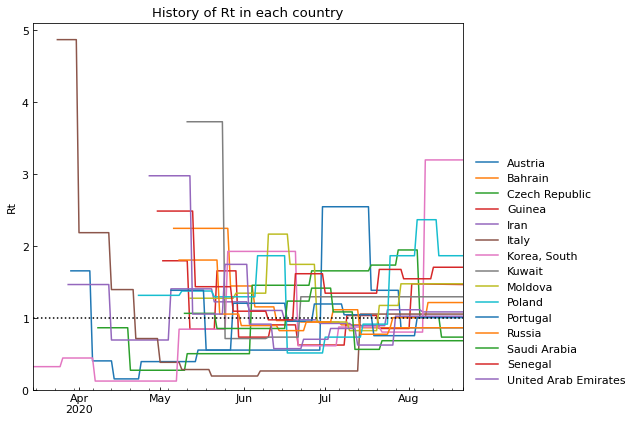

Country,Austria,Bahrain,Czech Republic,Guinea,Iran,Italy,"Korea, South",Kuwait,Moldova,Poland,Portugal,Russia,Saudi Arabia,Senegal,United Arab Emirates
Date,,,,,,,,,,,,,,,
2020-08-17,0.86,1.21,0.73,1.46,1.08,1.05,3.19,1.29,1.47,1.86,1.0,0.86,0.68,1.7,1.02
2020-08-18,0.86,1.21,0.73,1.46,1.08,1.05,3.19,1.29,1.47,1.86,1.0,0.86,0.68,1.7,1.02
2020-08-19,0.86,1.21,0.73,1.46,1.08,1.05,3.19,1.29,1.47,1.86,1.0,0.86,0.68,1.7,1.02
2020-08-20,0.86,1.21,0.73,1.46,1.08,1.05,3.19,1.29,1.47,1.86,1.0,0.86,0.68,1.7,1.02
2020-08-21,0.86,1.21,0.73,1.46,1.08,1.05,3.19,1.29,1.47,1.86,1.0,0.86,0.68,1.7,1.02


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

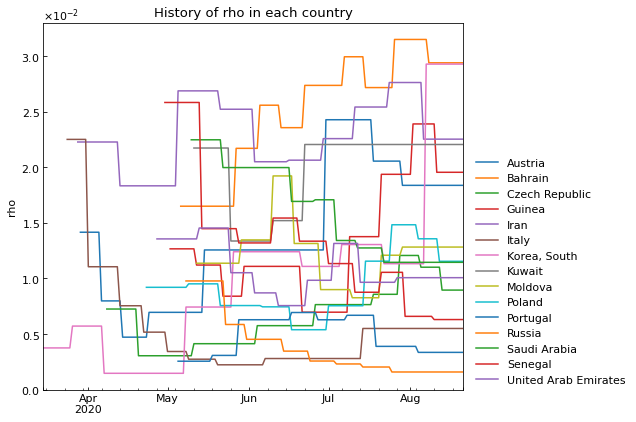

Country,Austria,Bahrain,Czech Republic,Guinea,Iran,Italy,"Korea, South",Kuwait,Moldova,Poland,Portugal,Russia,Saudi Arabia,Senegal,United Arab Emirates
Date,,,,,,,,,,,,,,,
2020-08-17,0.018365,0.029378,0.008952,0.019539,0.022517,0.005503,0.029262,0.022037,0.012819,0.01154,0.003354,0.001592,0.011447,0.006304,0.010068
2020-08-18,0.018365,0.029378,0.008952,0.019539,0.022517,0.005503,0.029262,0.022037,0.012819,0.01154,0.003354,0.001592,0.011447,0.006304,0.010068
2020-08-19,0.018365,0.029378,0.008952,0.019539,0.022517,0.005503,0.029262,0.022037,0.012819,0.01154,0.003354,0.001592,0.011447,0.006304,0.010068
2020-08-20,0.018365,0.029378,0.008952,0.019539,0.022517,0.005503,0.029262,0.022037,0.012819,0.01154,0.003354,0.001592,0.011447,0.006304,0.010068
2020-08-21,0.018365,0.029378,0.008952,0.019539,0.022517,0.005503,0.029262,0.022037,0.012819,0.01154,0.003354,0.001592,0.011447,0.006304,0.010068


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

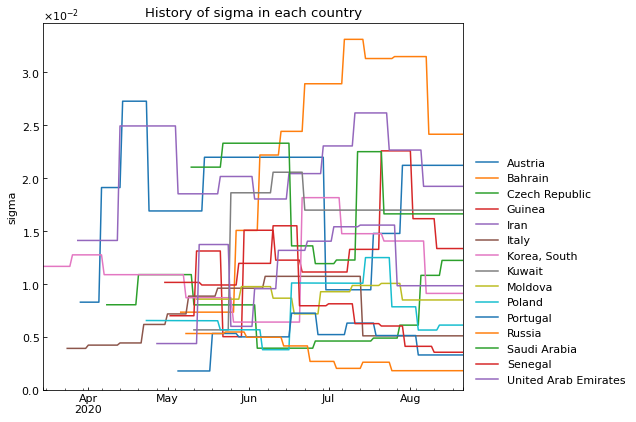

Country,Austria,Bahrain,Czech Republic,Guinea,Iran,Italy,"Korea, South",Kuwait,Moldova,Poland,Portugal,Russia,Saudi Arabia,Senegal,United Arab Emirates
Date,,,,,,,,,,,,,,,
2020-08-17,0.021211,0.02415,0.012224,0.013345,0.019225,0.005091,0.009104,0.016978,0.008483,0.006109,0.003284,0.001796,0.016622,0.003541,0.009829
2020-08-18,0.021211,0.02415,0.012224,0.013345,0.019225,0.005091,0.009104,0.016978,0.008483,0.006109,0.003284,0.001796,0.016622,0.003541,0.009829
2020-08-19,0.021211,0.02415,0.012224,0.013345,0.019225,0.005091,0.009104,0.016978,0.008483,0.006109,0.003284,0.001796,0.016622,0.003541,0.009829
2020-08-20,0.021211,0.02415,0.012224,0.013345,0.019225,0.005091,0.009104,0.016978,0.008483,0.006109,0.003284,0.001796,0.016622,0.003541,0.009829
2020-08-21,0.021211,0.02415,0.012224,0.013345,0.019225,0.005091,0.009104,0.016978,0.008483,0.006109,0.003284,0.001796,0.016622,0.003541,0.009829


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

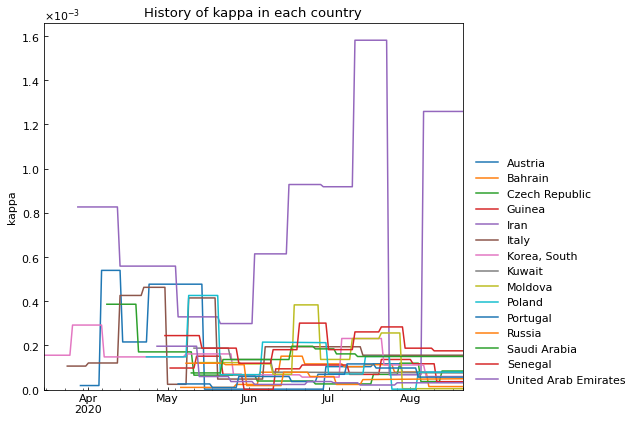

Country,Austria,Bahrain,Czech Republic,Guinea,Iran,Italy,"Korea, South",Kuwait,Moldova,Poland,Portugal,Russia,Saudi Arabia,Senegal,United Arab Emirates
Date,,,,,,,,,,,,,,,
2020-08-17,0.000079,0.000014,0.000085,0.000036,0.001258,0.000156,0.00006,0.000076,0.000005,0.000079,0.000057,0.00005,0.00015,0.000176,0.000031
2020-08-18,0.000079,0.000014,0.000085,0.000036,0.001258,0.000156,0.00006,0.000076,0.000005,0.000079,0.000057,0.00005,0.00015,0.000176,0.000031
2020-08-19,0.000079,0.000014,0.000085,0.000036,0.001258,0.000156,0.00006,0.000076,0.000005,0.000079,0.000057,0.00005,0.00015,0.000176,0.000031
2020-08-20,0.000079,0.000014,0.000085,0.000036,0.001258,0.000156,0.00006,0.000076,0.000005,0.000079,0.000057,0.00005,0.00015,0.000176,0.000031
2020-08-21,0.000079,0.000014,0.000085,0.000036,0.001258,0.000156,0.00006,0.000076,0.000005,0.000079,0.000057,0.00005,0.00015,0.000176,0.000031


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

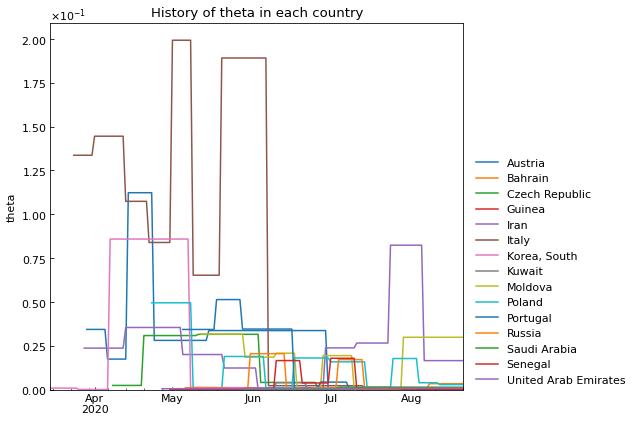

Country,Austria,Bahrain,Czech Republic,Guinea,Iran,Italy,"Korea, South",Kuwait,Moldova,Poland,Portugal,Russia,Saudi Arabia,Senegal,United Arab Emirates
Date,,,,,,,,,,,,,,,
2020-08-17,0.000344,0.00344,0.000824,0.000947,0.016576,0.000929,0.000158,0.000252,0.029896,0.002884,0.000166,0.001147,0.001384,0.000237,0.000938
2020-08-18,0.000344,0.00344,0.000824,0.000947,0.016576,0.000929,0.000158,0.000252,0.029896,0.002884,0.000166,0.001147,0.001384,0.000237,0.000938
2020-08-19,0.000344,0.00344,0.000824,0.000947,0.016576,0.000929,0.000158,0.000252,0.029896,0.002884,0.000166,0.001147,0.001384,0.000237,0.000938
2020-08-20,0.000344,0.00344,0.000824,0.000947,0.016576,0.000929,0.000158,0.000252,0.029896,0.002884,0.000166,0.001147,0.001384,0.000237,0.000938
2020-08-21,0.000344,0.00344,0.000824,0.000947,0.016576,0.000929,0.000158,0.000252,0.029896,0.002884,0.000166,0.001147,0.001384,0.000237,0.000938


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15711 entries, 0 to 15906
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 15711 non-null  datetime64[ns]
 1   Country                              15711 non-null  object        
 2   Rt                                   15711 non-null  float64       
 3   theta                                15711 non-null  float64       
 4   kappa                                15711 non-null  float64       
 5   rho                                  15711 non-null  float64       
 6   sigma                                15711 non-null  float64       
 7   School_closing                       15711 non-null  int64         
 8   Workplace_closing                    15711 non-null  int64         
 9   Cancel_events                        15711 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,0.036508,-0.053888,0.624787,-0.210043,-0.001064,0.150548,-0.188403,0.164692,0.193541,0.259868,0.203291,0.257432,-0.026874,0.021359,-0.019098,0.246576
theta,0.036508,1.000000,0.125489,0.077621,0.153454,0.272649,0.281358,0.107444,-0.183806,-0.005763,-0.002206,0.055234,-0.001327,0.003779,-0.398060,0.020764,0.252032
kappa,-0.053888,0.125489,1.000000,0.278798,0.410622,0.307017,0.181327,0.073562,-0.167357,-0.027318,-0.074451,-0.202267,-0.060877,-0.143539,-0.459701,-0.111368,0.102870
rho,0.624787,0.077621,0.278798,1.000000,0.577955,0.162167,0.023874,-0.229109,-0.134863,-0.004753,-0.029256,-0.073277,0.249467,-0.208132,-0.296650,-0.199667,0.105188
sigma,-0.210043,0.153454,0.410622,0.577955,1.000000,0.225875,-0.100529,-0.116318,-0.436128,-0.333350,-0.341359,-0.412922,0.070089,-0.182419,-0.498483,-0.191820,-0.151143
School_closing,-0.001064,0.272649,0.307017,0.162167,0.225875,1.000000,0.371087,0.536529,0.133674,0.153629,0.363307,0.045726,0.312800,-0.072898,-0.068069,-0.055231,0.577661
Workplace_closing,0.150548,0.281358,0.181327,0.023874,-0.100529,0.371087,1.000000,0.542277,0.462177,0.554246,0.632477,0.420582,0.067177,-0.031383,0.189256,-0.012915,0.738847
Cancel_events,-0.188403,0.107444,0.073562,-0.229109,-0.116318,0.536529,0.542277,1.000000,0.508196,0.412921,0.584203,0.371061,-0.017883,-0.028239,0.321669,-0.035331,0.645705
Gatherings_restrictions,0.164692,-0.183806,-0.167357,-0.134863,-0.436128,0.133674,0.462177,0.508196,1.000000,0.708174,0.723703,0.625570,0.157468,0.059622,0.669883,0.061900,0.703196
Transport_closing,0.193541,-0.005763,-0.027318,-0.004753,-0.333350,0.153629,0.554246,0.412921,0.708174,1.000000,0.698564,0.813710,0.118969,-0.136139,0.545835,-0.030114,0.754160


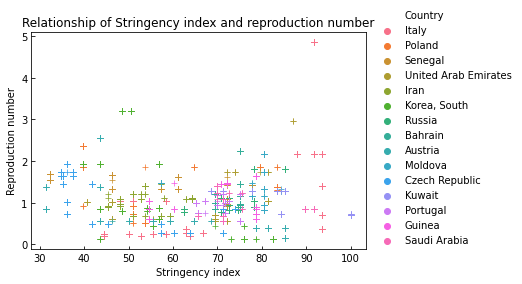

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()